# POLI 175

## Class 03 - What is Machine Learning (cont'd) and some Julia

Dr. Umberto Mignozzetti

UCSD

## Model Accuracy

- Too many methods... How to choose?

- *There is no free lunch in machine learning*: **no one method dominates all others over all possible data sets.**.

- We will spend some time choosing methods, and then, choosing the best *tunning* parameters for these methods.

- One criterion: 

**Mean Squared Error (MSE)**

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i − \hat{f}(x_i))^2 $$

## Model Accuracy
**Mean Squared Error (MSE)**

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i − \hat{f}(x_i))^2 $$

- We can compute the MSE on the *training* data, but what we really want to know is how the MSE performs in *unseen* data.

- That's why for most training purposes, we will split our dataset into two parts: *training* and *testing*.

- We want to compute the MSE in this *testing* data: it is our best shot at knowing how it is going to behave in real-world applications!

## Model Accuracy

**Mean Squared Error (MSE)**

![bvt](../img/bvt.png)

## Model Accuracy

**Mean Squared Error (MSE)**

![bvt](../img/bvt2.png)

## Model Accuracy

**Bias-Variance Trade-off**:

$$ E(y_0 - \hat{f}(x_0))^2 \ = \ Var(\hat{f}(x_0)) + [Bias(\hat{f}(x_0))]^2 + Var(\varepsilon) $$

- When we adopt a more flexible approach, we **decrease** the bias (distance between $f$ and $\hat{f}$). This means that the training MSE decreases.

- However, when we adopt a more flexible approach, we **increase** the variance (think overfitting).

Our job is to fit a model that has **low bias** and **low variance**.

$$ E(y_0 - \hat{f}(x_0))^2 \ = \ Var(\hat{f}(x_0)) + [Bias(\hat{f}(x_0))]^2 + Var(\varepsilon) $$## Model Accuracy

**Bias-Variance Trade-off**

![bvt](../img/bvt3.png)

# Julia

## Julia

Let's get started with [Julia](https://julialang.org/). For the rest of the class, we will:

1. Syntax
1. Load and check data in Julia
1. Create a simple plot 
1. Run our first ML model (simple regression)

## Julia

Julia is new: 2012. And it was designed for scientific computing.

The idea was to create a programming language that was scripted (like python), yet as fast as compiled languages (like C).

Julia scripts: End with `.jl`

Its syntax is somewhat similar to Python, and like Python, it is general purpose.

## Coding blocks

In [1]:
# This is a single-line comment in Julia
println("Hello world!") # This is a coding line

Hello world!


In [ ]:
#=
This is a
multiline comment
in Julia
=#
println("Hello world again!")

## Operators

To do simple math, we can use the following [operators](https://docs.julialang.org/en/v1/manual/mathematical-operations/):

| Operator | Operation      | Description                    |
|----------|----------------|--------------------------------|
| x + y    | binary plus    | performs addition              |
| x - y    | binary minus   | performs subtraction           |
| x * y    | times          | performs multiplication        |
| x / y    | divide         | performs division              |
| x ÷ y    | integer divide | x / y, truncated to an integer |
| x ^ y    | power          | raises x to the yth power      |
| x % y    | remainder      | equivalent to rem(x,y)         |

And parenthesis set the scope of operations.

## Variables

[Variable assignment](https://docs.julialang.org/en/v1/manual/variables/) has similar rules to python and R:

In [13]:
# Investment parameters
initial = 100
interest_year = 0.05
comp_frequency = 12
time = 6

# Capital in the end
println(initial * (1 + interest_year / comp_frequency) ^ time)

102.52618679545891


## Data types

Julia has several [data types](https://docs.julialang.org/en/v1/manual/types/).

For example, these are the [numeric data types hierarchy in Julia](https://en.wikibooks.org/wiki/Introducing_Julia/Types):

![numeric](https://upload.wikimedia.org/wikipedia/commons/d/d9/Julia-number-type-hierarchy.svg)

Usually, data types are inferred from the definition of the object.

In [ ]:
# for our investment parameters
println(typeof(time))
println(typeof(interest_year))

Int64
Float64


## Data types

Booleans (all lower case):

In [16]:
is_raining = false
is_morning = true
println(is_raining)
println(typeof(is_morning))

false
Bool


Strings (only double quotations):

In [17]:
my_name = "Umberto"
println(my_name)
println(typeof(my_name))

Umberto
String


## Data types

Boolean operations:

In [19]:
println(!is_raining)
println(true && false)
println(true || false)
println(is_raining == is_morning)
println(10 >= 5)
println(2 != 2.0)

true
false
true
false
true
false


## [Libraries](https://juliadatascience.io/standardlibrary):

In [20]:
# Library for dates
using Dates

1999-01-01

In [22]:
Date(1999)

1999-01-01

In [21]:
Date(1999, 02, 03)

1999-02-03

## [Libraries](https://docs.julialang.org/en/v1/stdlib/Random/):

In [23]:
# Library for random numbers
using Random

In [24]:
# One random number between [0, 1)
rand()

0.03929959326752519

In [26]:
# Two random numbers between [0, 1)
rand(2)

2-element Vector{Float64}:
 0.3124801969066159
 0.8083712787912616

## Install Libraries

In [33]:
# Library for Libraries
using Pkg

In [45]:
# Install dataframes library
Pkg.add("DataFrames")

# Install library for csv files
Pkg.add("CSV")

# Install library for plotting
Pkg.add("Plots")

# Install library for regression
Pkg.add("GLM")

LoadError: `DataFrames CSV Plots` is not a valid package name

## Load CSV files

In [68]:
# Load CSV dataframe
using CSV
using DataFrames
using Plots
using GLM

In [37]:
# Loading Education Expenditure dataset
educexp = CSV.read("../data/educexp.csv", DataFrame)

Row,education,income,young,urban,states
,Int64,Int64,Float64,Int64,String3
1,189,2824,350.7,508,ME
2,169,3259,345.9,564,NH
3,230,3072,348.5,322,VT
4,168,3835,335.3,846,MA
5,180,3549,327.1,871,RI
6,193,4256,341.0,774,CT
7,261,4151,326.2,856,NY
8,214,3954,333.5,889,NJ
9,201,3419,326.2,715,PA


## Exploring

In [38]:
# Dataset dimension
size(educexp)

(51, 5)

In [39]:
# Column names
names(educexp)

5-element Vector{String}:
 "education"
 "income"
 "young"
 "urban"
 "states"

## Exploring

In [43]:
# Head
first(educexp, 3)

Row,education,income,young,urban,states
,Int64,Int64,Float64,Int64,String3
1,189,2824,350.7,508,ME
2,169,3259,345.9,564,NH
3,230,3072,348.5,322,VT


In [44]:
# Tail
last(educexp, 3)

Row,education,income,young,urban,states
,Int64,Int64,Float64,Int64,String3
1,273,3968,348.4,909,CA
2,372,4146,439.7,484,AK
3,212,3513,382.9,831,HI


## Exploring

In [49]:
describe(educexp)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,education,196.314,112,192.0,372,0,Int64
2,income,3225.29,2081,3257.0,4425,0,Int64
3,young,358.886,326.2,354.1,439.7,0,Float64
4,urban,664.51,322,664.0,1000,0,Int64
5,states,,AK,,WY,0,String3


## Histogram

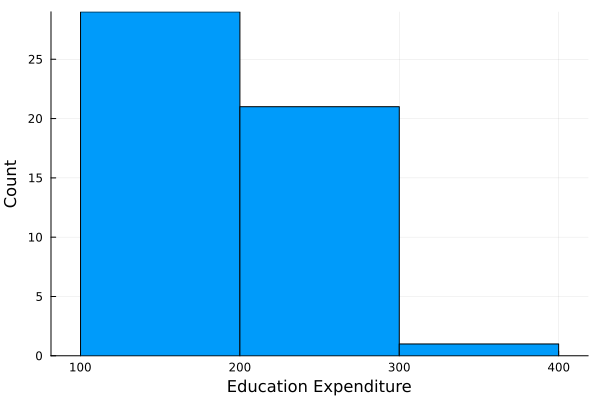

In [58]:
histogram(
    educexp.education, 
    bins = 3, 
    xlabel = "Education Expenditure", 
    ylabel = "Count",
    legend = false
)

## Scatterplot

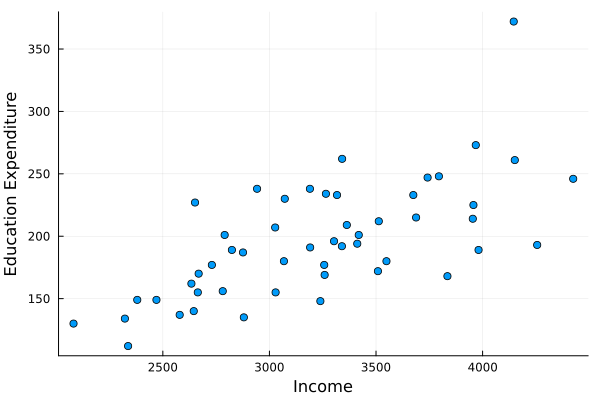

In [66]:
scatter(
    educexp.income,
    educexp.education,
    xlabel = "Income", 
    ylabel = "Education Expenditure",
    legend = false
)

## Scatterplot

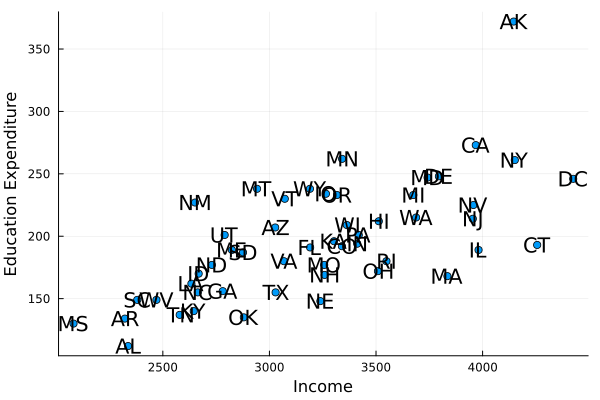

In [67]:
scatter(
    educexp.income,
    educexp.education,
    xlabel = "Income", 
    ylabel = "Education Expenditure",
    series_annotations = educexp.states,
    legend = false
)

## Linear Regression

In [69]:
fm = @formula(education ~ income)
mod = lm(
    fm,
    educexp
)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

education ~ 1 + income

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.   Std. Error     t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  17.71       28.8738      0.61    0.5425  -40.3141     75.7342
income        0.0553759   0.00882287  6.28    <1e-07    0.0376457   0.0731062
─────────────────────────────────────────────────────────────────────────────

## Questions?

## See you in the next class!